# Avocado Project

Avocado is a fruit consumed by people heavily in the United States. 

This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the data
df= pd.read_csv('Avocado.csv')
df=df.drop('Unnamed: 0', axis=1)

In [3]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's check the features present in our data and then we will look at their data types.

In [4]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

It can be observe that AveragePrice is the target variable.Let's look at the shape of the dataset.

In [5]:
df.shape

(16468, 13)

We have 12 independent variables and 1 target variable. We will predict the AveragePrice with the help of model built using the train data.
Next, let's look at how many categorical and numerical variables are there in our dataset. We will look at their data types.

In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
# Print data types for each variable
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
dtype: object

We can see there are two format of data types:
1. float64: It represents the float variable. Float variables in our dataset is: AveragePrice, Total Volume, 4046, 4225,4770, Toal Bags,Small Bags, Large Bags, XLarge Bags, year
2. object: It represents the categorical variables. Categorical variables in our dataset are: Date, type, region

In [8]:
# We will look for any missing values in the dataset.
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

We have find the missing values in the dataset. Let's remove missing value.

In [9]:
df=df.dropna()
df.shape

(1517, 13)

In [10]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no missing value in the dataset now.

In [11]:
df['XLarge Bags'].value_counts()

0.00       798
15.88        2
37.50        2
240.28       2
11.27        2
          ... 
4464.22      1
778.00       1
3397.00      1
52.33        1
35.92        1
Name: XLarge Bags, Length: 711, dtype: int64

In [12]:
df['type'].value_counts()

conventional    1517
Name: type, dtype: int64

In [13]:
df['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

In [14]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
HarrisburgScranton     19
Syracuse               19
GreatLakes             18
Midsouth               18
MiamiFtLauderdale      17
Roanoke                17
DallasFtWort

In [15]:
df=df.drop(['Date','type'],axis=1)
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,Charlotte
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,Charlotte
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,Charlotte
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,Charlotte


# Univariate Analysis

Now Let's look at the distribution of our target variable. Let us look at its frequency table.

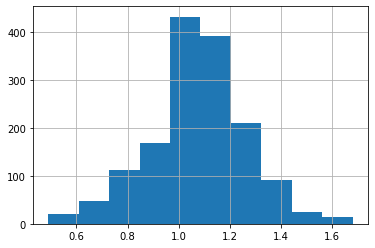

In [16]:
df['AveragePrice'].hist()

From above we have observed the number of particular range of AveragePrice. As from above we can analysis that in our data AveragePrice in the range of 0.99 to 1.09 is 430. As like this we can also observe the aother value counts also.

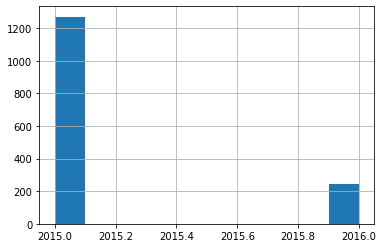

In [17]:
df['year'].hist()

# Bivariate Analysis

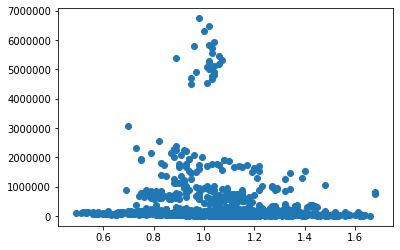

In [18]:
plt.scatter(df['AveragePrice'], df['Total Bags'])

From above we can observe the relation between AveragePrice vs Total Bags.

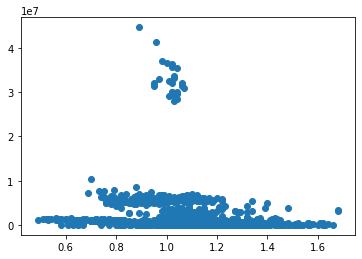

In [19]:
plt.scatter(df['AveragePrice'], df['Total Volume'])

From above we can observe the relation between AveragePrice vs Total Volume.

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
df['region']=le.fit_transform(df['region'])

In [23]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015.0,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015.0,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015.0,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015.0,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015.0,0
...,...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016.0,7
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016.0,7
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016.0,7
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016.0,7


# Multivariate Analysis

In [24]:
# Checking correlation
corr=df.corr()

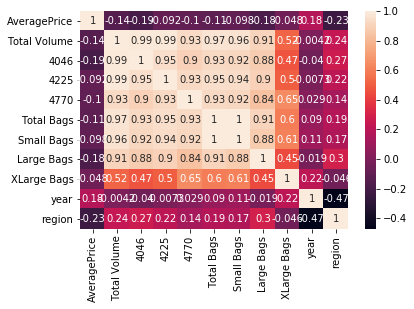

In [25]:
sns.heatmap(corr, annot=True)

In [26]:
corr['AveragePrice'].sort_values()

region         -0.229408
4046           -0.190096
Large Bags     -0.177480
Total Volume   -0.140470
Total Bags     -0.111597
4770           -0.100567
Small Bags     -0.097682
4225           -0.092084
XLarge Bags    -0.048284
year            0.178683
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

# Let's check the data distribution among all column.

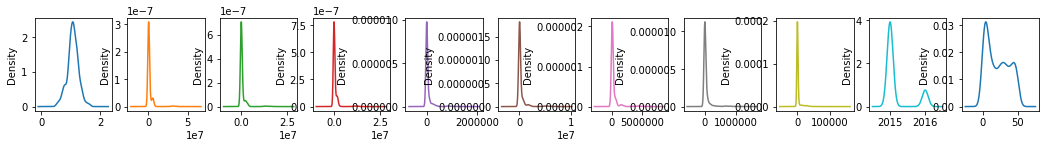

In [27]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,figsize=(18,12))
plt.show()

In [28]:
# Declaration of independent variable.
x=df.drop('AveragePrice',axis=1)

In [29]:
# Declaration of target variable.
y=df['AveragePrice']

In [30]:
x.skew()

Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [31]:
from sklearn.preprocessing import power_transform

In [32]:
pt=power_transform(x, method='yeo-johnson')

C:\Users\PRIYA\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [33]:
x=pd.DataFrame(pt, columns=x.columns)

In [34]:
x.skew()

Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            0.000000
region         -0.209568
dtype: float64

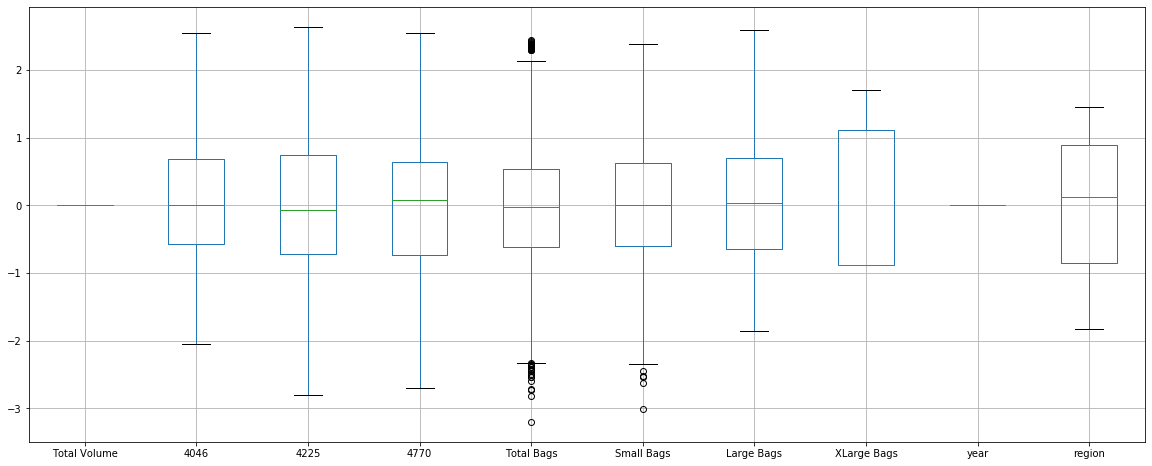

In [35]:
#Checking Outlier
x.boxplot(figsize=[20,8])

In [36]:
# Removing Outlier
from scipy import stats
df['Total Volume']=stats.zscore(df['Total Volume'])
df['4046']=stats.zscore(df['4046'])
df['4225']=stats.zscore(df['4225'])
df['4770']=stats.zscore(df['4770'])
df['Total Bags']=stats.zscore(df['Total Bags'])
df['Small Bags']=stats.zscore(df['Small Bags'])
df['XLarge Bags']=stats.zscore(df['XLarge Bags'])
df['Large Bags']=stats.zscore(df['Large Bags'])
df['year']=stats.zscore(df['year'])

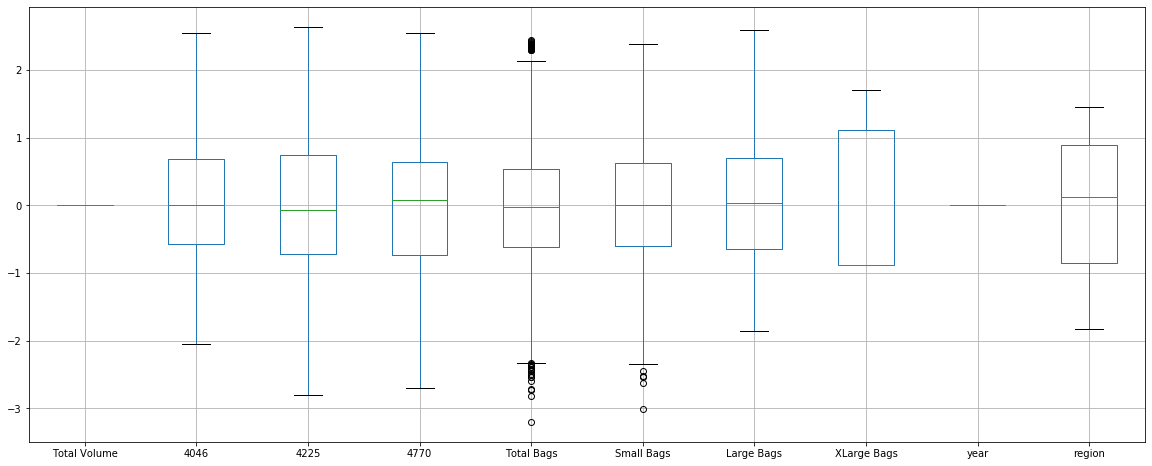

In [37]:
x.boxplot(figsize=[20,8])

# Model Building

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
# splitting into train and validation with 30% data in validation set and 70% data in train set.
x_train, x_test, y_train, y_test=train_test_split(x,y,random_state=5, test_size=0.3)

Now our data is ready. Its time to build our model and check its performance. Linear regression is used for continous problems and as it is a continous problem let's first build a Linear Regression model.

# Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
lr=LinearRegression()        # defining the logistic regression model
lr.fit(x_train,y_train)      # fitting the model on  X_train and y_train
pred= lr.predict(x_test)     # making prediction on the validation set

In [42]:
lr.score(x_test, y_test)

0.3633080146848223

In [43]:
lr.score(x_train, y_train)

0.3152826882490858

Now we will evaluate how accurate our predictions are. As the evaluation metric for this problem is mean squared error and root mean squared error, let's calculate the that on validation set.

In [44]:
#Evaluting the model
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test,pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 0.11510313280127404
Mean Squared Error: 0.022292786853754517
Root Mean Squared Error: 0.14930769187739296


In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cvs=cross_val_score(lr,x,y, cv=6)
print('The cross validation score is :', cvs.mean())

The cross validation score is : 0.004080407591916885


# Lasso Analysis

In [47]:
from sklearn import linear_model
reg1= linear_model.Lasso(alpha=50,max_iter=80, tol=0.2)
reg1.fit(x_train, y_train)
reg1.score(x_test,y_test)

-0.004709639886908645

In [48]:
reg1.score(x_train,y_train)

0.0

# Ridge Analysis

In [49]:
from sklearn import linear_model
reg2= linear_model.Ridge(alpha=20,max_iter=100, tol=0.1)
reg2.fit(x_train, y_train)
reg2.score(x_test,y_test)

0.3546446700854168

In [50]:
reg2.score(x_train,y_train)

0.3017118174508626

Minimum difference between train data and test data scores is for Linear Regression(0.05), so this is our best model.

In [51]:
import joblib
joblib.dump(lr,'Avocado.pk1')

['Avocado.pk1']

# Conclusion

Here we can notic that our best model is Linear Regression with 36% score with test data.